# Capstone Project: Churn Analysis


# Data Exploration


# Explore statistics and empirical cumulative distribution  

- Calculate the statistics, plot histogram and empirical cumulative distribution function for the features that have continuous values ("tenture", "MonthlyCharges","TotalCharges"). Through the statistics and histograms, it seems that there is no outlier in these features.
- Plot the ECD for the tenture of customers who had churned and that of customers who had not churned. An interesting finding is that 80% of the customers who had churned had tenture less than 40 months, which means if the most of the customers who are likely to churn would do so before 40 months. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle

In [13]:
infile = open('C:\A\Education\Data Science\Capstone project 1\data_wrangling','rb')
df= pickle.load(infile)
infile.close()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
gender                                   7043 non-null int32
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int32
Dependents                               7043 non-null int32
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int32
PaperlessBilling                         7043 non-null int32
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
Churn                                    7043 non-null int32
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                

In [15]:
#create a list for countinous features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
# calculate the statistics of the countinous features
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017007235198>,
      dtype=object)

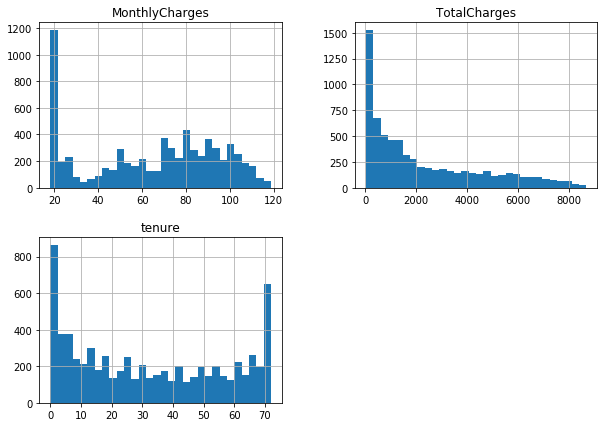

In [17]:
#plot the histograms for the continous features
df[numerical_features].hist(bins=30, figsize=(10, 7))

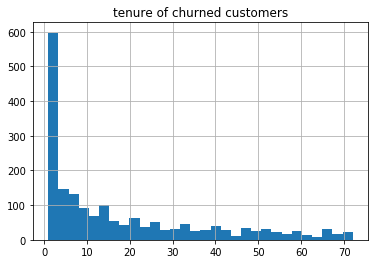

In [18]:
# plot histogram for tenture of churn customers
df.tenure.loc[df.Churn==1].hist(bins=30)
_=plt.title('tenure of churned customers')


In [19]:
# define ecdf (Empirical Cumulative Distribution Function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

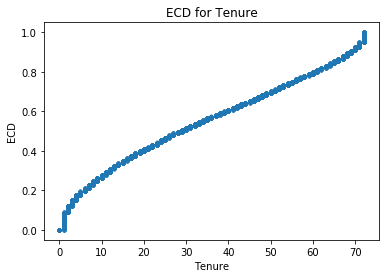

In [20]:
# Compute ECDF for Tenture
x, y = ecdf(df.tenure)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('Tenure')
_=plt.ylabel('ECD')
_=plt.title('ECD for Tenure')

plt.show()


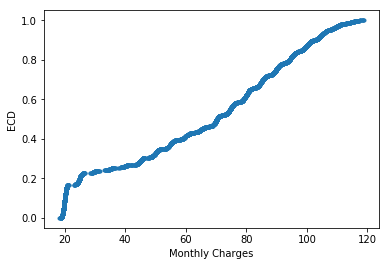

In [21]:
# Compute ECDF for monthly charges
x, y = ecdf(df.MonthlyCharges)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('Monthly Charges')
_=plt.ylabel('ECD')


plt.show()


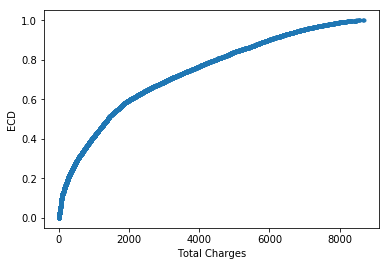

In [22]:
# Compute ECDF for total charges
x, y = ecdf(df.TotalCharges)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('Total Charges')
_=plt.ylabel('ECD')


plt.show()


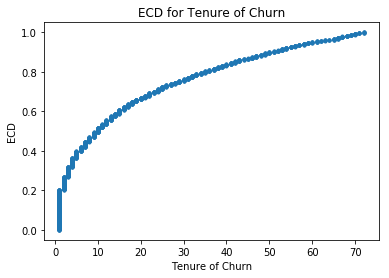

In [23]:
churn_tenure=df.tenure.loc[df.Churn==1]

# Compute ECDF for tenures of customers who had churned
x, y = ecdf(churn_tenure)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('Tenure of Churn')
_=plt.ylabel('ECD')
_=plt.title('ECD for Tenure of Churn')

plt.show()


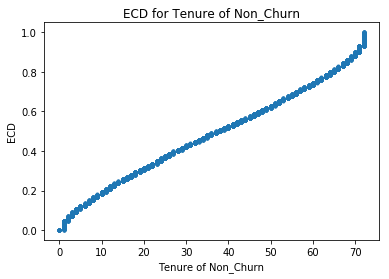

In [24]:
non_churn_tenure=df.tenure.loc[df.Churn==0]


# Compute ECDF for tenture of customers who had not churned
x, y = ecdf(non_churn_tenure)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('Tenure of Non_Churn')
_=plt.ylabel('ECD')
_=plt.title('ECD for Tenure of Non_Churn')

plt.show()


# Explore correlations between features

Create a correlation heat map for all of the features to discover which features are positively or negatively correlated to others. To avoid colinearity in the following analysis, I drop the features that are strongly correlated to others. Columns dropped:'OnlineSecurity_No internet service','StreamingMovies_No internet service', 'OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','TotalCharges','InternetService_Fiber optic','MultipleLines_No phone service','MonthlyCharges'. Re-plot the correlation heat map to make sure there is colinearity among the features.

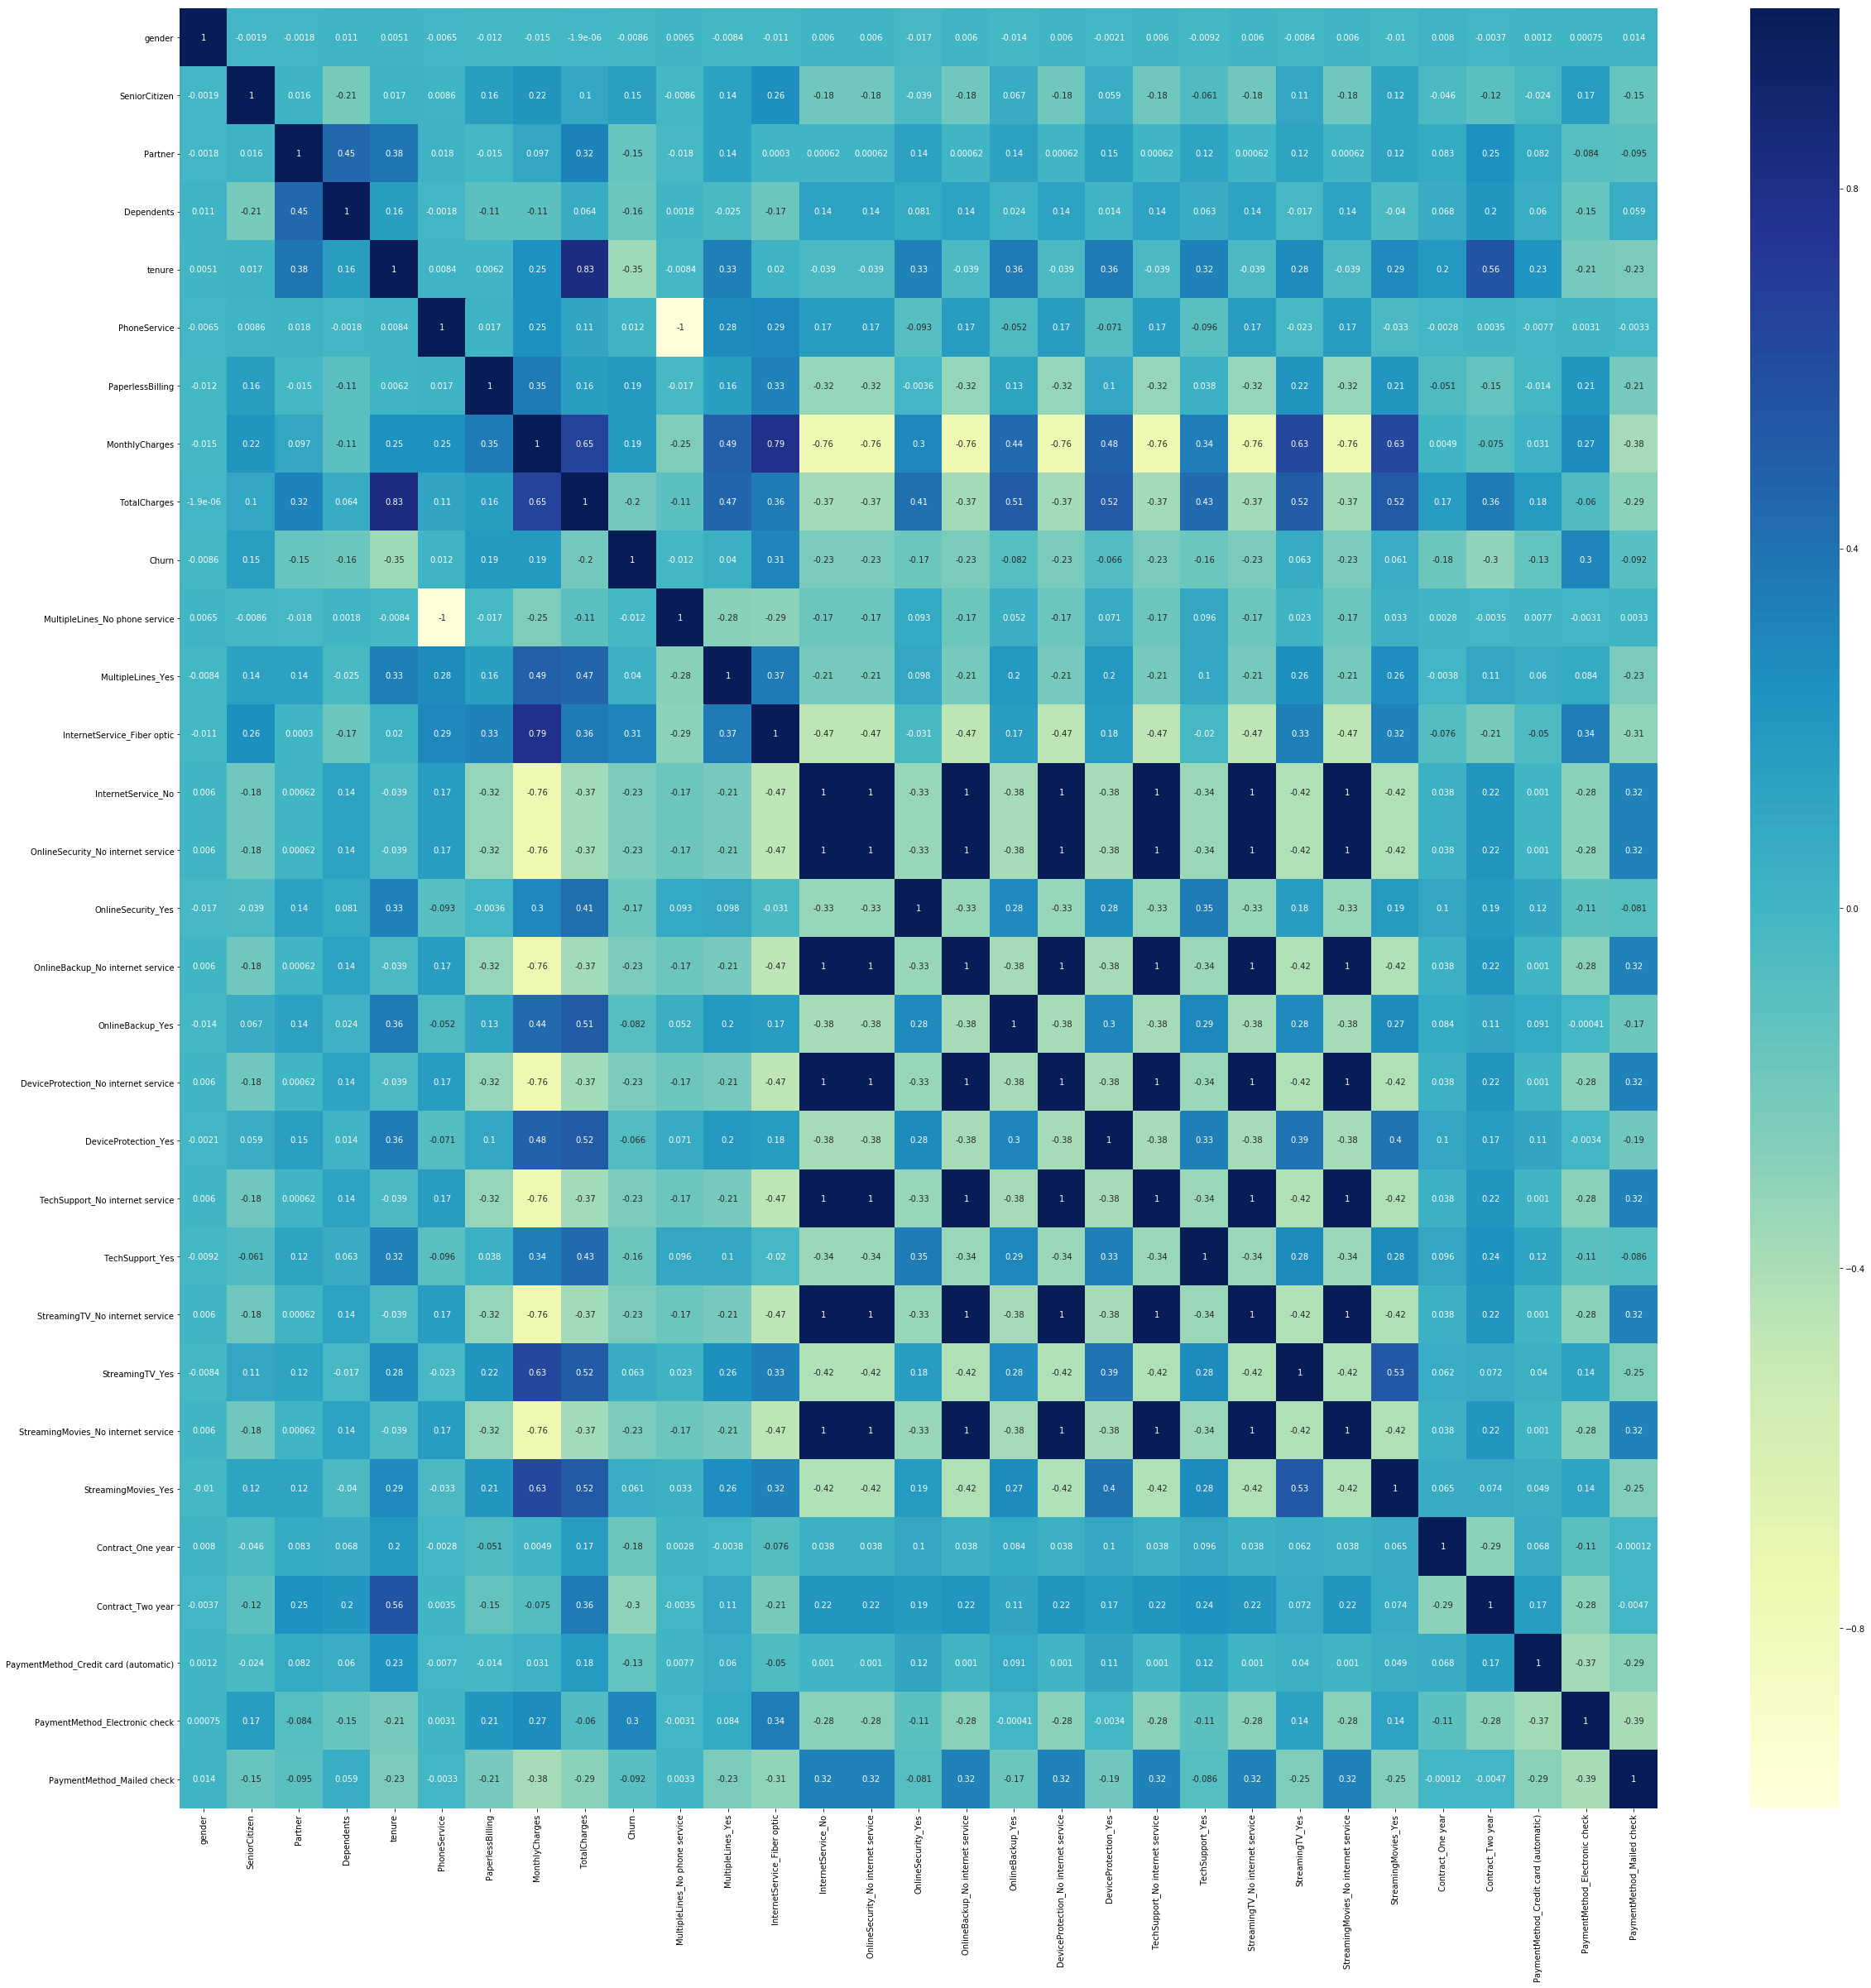

In [25]:
#create correlation matrix for all of the features
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

In [26]:
# drop the folloing columns since they are collinear with other features
df_drop=df.drop(columns=['OnlineSecurity_No internet service','StreamingMovies_No internet service', 'OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','TotalCharges','InternetService_Fiber optic','MultipleLines_No phone service','MonthlyCharges'],axis=1)

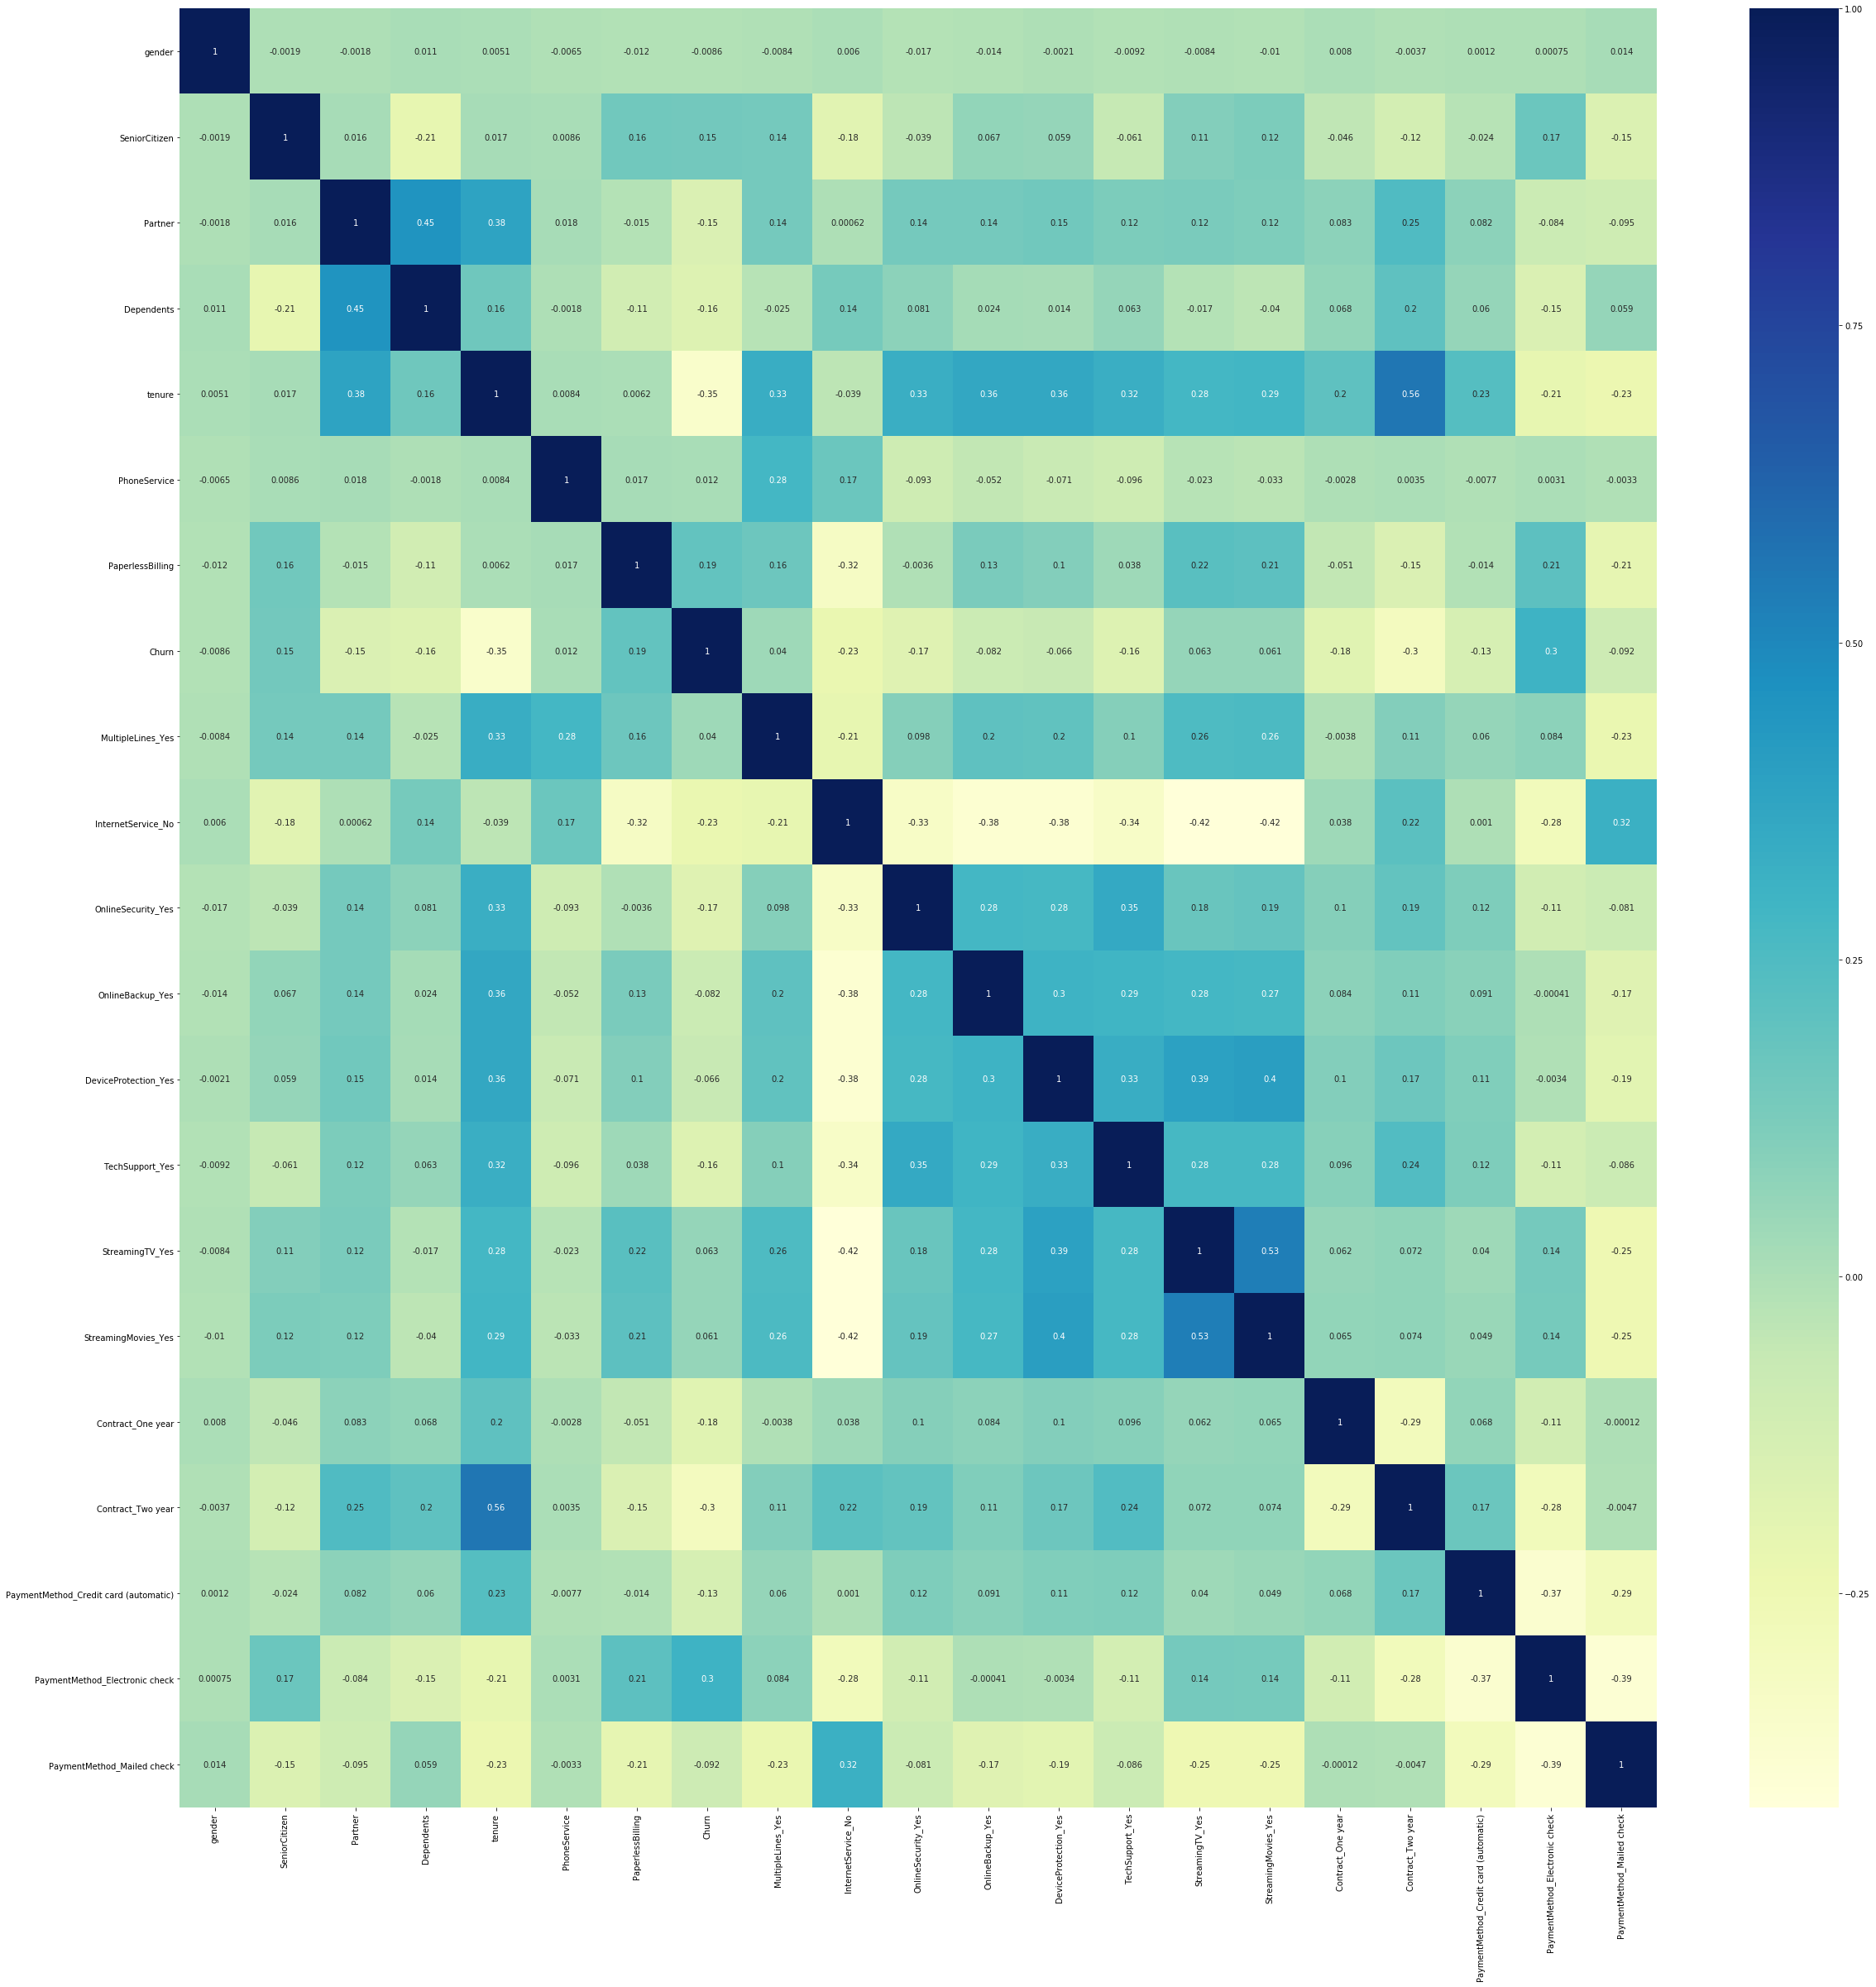

In [27]:
# plot correlation matrix after dropping the features
plt.figure(figsize=(40,40))
sns.heatmap(df_drop.corr(),cmap="YlGnBu",annot=True)

# Pickle the file 
Drop the column of 'customerID' since it is not useful for next stage analysis. Create a pickle file for data exploration.

In [28]:
# drop the column of 'customerID'
df_drop=df_drop.drop(columns=['customerID'],axis=1)
df_drop.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Churn,MultipleLines_Yes,InternetService_No,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# pickle the dataframe for data exploring
outfile = open('C:\A\Education\Data Science\Capstone project 1\data_exploration','wb')
pickle.dump(df_drop,outfile)
outfile.close()